# PART 1: Getting Authors and Titles from Tabula-exported TSV Data

The object: go from a list of tsv filenames (maybe I'll bin them by year?) to an array of [date, rank, weeks on list, title, author(s)]


In [49]:
import xml.etree.ElementTree
import urllib2
import re, string

f_filen = "tabula-1963-03-17.tsv"
nf_filen = "tabula-1963-03-17-nf.tsv"
#How far into the tsv file the data shows up...
data_i = 2
fields = ['rank','title+author','rank_last_week','weeks_on_list']

import csv
from datetime import datetime

def empty(row):
    if row[0]=="":
        return True
    return False 

def extract_date(datestr):
    print datestr
    try:
        date = datetime.strptime(datestr[0],'%B %d, %Y')
    except ValueError:
        try:
            date = datetime.strptime(datestr[0],'%B %d,%Y')
        except ValueError:
            datestr = input("Enter the date in %B %d, %Y format: ")
            date = datetime.strptime(datestr,'%B %d, %Y')
    print date
    return date

def is_number(s):
    try:
        float(s)
        print s+" is number!"
        return True
    except ValueError:
        return False

def header(row):
    if is_number(row[0]):
        return False
    else:
        return True

##Indexes into row data_i of a tsv and then reads it into an array of arrays
def read_tsv(name):
    i = 0
    arr = []
    date = ""
    with open(name) as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            if (header(row)) & (not empty(row)) & (i>1):
                print "Breaking out on this row! " +str(row)
                return arr
            if i ==0 :
                date = extract_date([row[1]])
            if ((i > data_i) & (not empty(row))):
                arr.append([date]+row)
            i = i+1
        return arr
    
commasv = read_tsv(nf_filen)
print len(commasv)

['March 17, 1963']
1963-03-17 00:00:00
1 is number!
2 is number!
3 is number!
4 is number!
5 is number!
6 is number!
7 is number!
8 is number!
9 is number!
10 is number!
10


In [69]:
import os

def read_folder(folderpath):
    empty_array = []
    for f in os.listdir(folderpath):
        commasv = read_tsv(path+f)
        empty_array = empty_array+commasv
    return empty_array

path = "1980/"
eighty = read_folder(path)
for x in eighty[0:20]:
    print x

['February 3, 1980']
1980-02-03 00:00:00
1 is number!
2 is number!
3 is number!
4 is number!
5 is number!
6 is number!
7 is number!
8 is number!
9 is number!
10 is number!
11 is number!
12 is number!
13 is number!
14 is number!
15 is number!
Breaking out on this row! ['This', 'February 3, 1980', 'Last', 'Weeks']
['April 27, 1980']
1980-04-27 00:00:00
1 is number!
2 is number!
3 is number!
4 is number!
5 is number!
6 is number!
7 is number!
8 is number!
9 is number!
10 is number!
11 is number!
12 is number!
13 is number!
14 is number!
15 is number!
Breaking out on this row! ['This', 'April 27, 1980', 'Last', 'Weeks']
['May 18, 1980']
1980-05-18 00:00:00
1 is number!
2 is number!
3 is number!
4 is number!
5 is number!
6 is number!
7 is number!
8 is number!
9 is number!
10 is number!
11 is number!
12 is number!
13 is number!
14 is number!
15 is number!
Breaking out on this row! ['This', 'May 18, 1980', 'Last', 'Weeks']
['June 29, 1980']
1980-06-29 00:00:00
1 is number!
2 is number!
3 is n

In [55]:
manual_titles = []
manual_genders = []
done_dict = {}
viaf_dict={}
gender_dict={}

In [171]:
ta_to_data = {}

In [176]:
#print sixtythree[4]
def batch_process_lists(list_of_lists):
    batch_target = []
    for ls in list_of_lists:
        batch_target = batch_target + process(ls)
    return batch_target    


# outputs data as a table form:
# date, year, ranks, title, authors, isbns, gender, categories, subjects, holdings

def process(ls):
    target = []
    i=0
    for row in ls:
        print i
        date = row[0]
        ranks = {"this_week":row[1],"last_week":row[3],"weeks_on_list":row[4]}
        ta_tuple = title_author_pair(row[2])
        title = ta_tuple[0]
        authors = ta_tuple[1]
        new_row = [date,date.year,ranks,title,authors]
        if str(ta_tuple) in ta_to_data:
            data = ta_to_data[str(ta_tuple)]
            new_row = new_row+data
        else:
            try:
                isbns = get_isbns(title,authors)
            except:
                print "Can't get ISBNS for some reason!"
                isbns = []
            data = [isbns]
            if len(isbns)>0:
                o_data = oclc_process(isbns,authors)
                gender = o_data['genders']
                categories = o_data['categories']
                subjects = o_data['subjects']
                data = data + [gender,categories,subjects] 
                new_row = new_row + data
            ta_to_data[str(ta_tuple)] = data
        target.append(new_row)
        i = i+1
    return target

print eighty[130]
batch = process(eighty)

[datetime.datetime(1980, 10, 19, 0, 0), '11', 'COME POUR THE WINE, by Cynthia Freeman. (Arbor House, $12.95.) A', '--', '1']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
<addinfourl at 140646483330328 whose fp = <socket._fileobject object at 0x7fead029f75

In [197]:
import pandas

boring_ddc = ['823','813','FIC','Unclassified']

def boring(ddc):
    for x in boring_ddc:
        if x in ddc:
            return True
    return False

mysteries = 0
horror_thriller = 0
spy = 0
fsf = 0
romances = 0
cowboys = 0
subject_arr = []
genre_arr = []

print len(batch)
for x in batch:
    if len(x)>8:
        if x[8] is not None:
            for y in x[8]:
                sub = y['subject']
                subject_arr.append(sub)
                norm_sub = norm_text(sub)
                if ('fiction' in norm_sub) or ('stories' in norm_sub) or ('tales' in norm_sub):
                    genre_arr.append(sub)
                if ('horror' in norm_sub) or ('thrill' in norm_sub):
                    horror_thriller = horror_thriller +1
                    print 'horror_thriller: '+x[3]
                if ('detect' in norm_sub) or ('myster' in norm_sub):
                    mysteries = mysteries +1
                    print 'mystery: '+x[3]
                if ('romanc' in norm_sub) or ('erotic' in norm_sub) or ('domestic' in norm_sub):
                    print 'romance: '+x[3]+str(x[4])+y['fast_id']
                    romances = romances +1
                if ('spy ' in norm_sub) or ('political' in norm_sub):
                    print 'spy:'+x[3]
                    spy = spy+1
                if ('science' in norm_sub) or ('fantasy' in norm_sub):
                    print 'scifi/fantasy:'+x[3]
                    fsf = fsf+1
                if ('cowboy' in norm_sub) or ('cowgirl' in norm_sub) or ('western stories' in norm_sub):
                    print 'western:'+x[3]
                    cowboy = cowboy+1

for x in batch:
    if "princess" in norm_text(x[3]):
        print x
        break
                    
counts = pandas.Series(subject_arr).value_counts()
print counts

genre_counts = pandas.Series(genre_arr).value_counts()
print genre_counts

print "western: "+str(cowboys)
print "spy/politics: "+str(spy)
print "fsf: "+str(fsf)
print "horror: "+str(horror_thriller)
print "mysteries: "+str(mysteries)
print "romances: "+str(romances)

780
spy:JAILBIRD
romance: THE ESTABLISHMENT['Howard Fast']896624
horror_thriller: THE DEAD ZONE
romance: THE LAST ENCHANTMENT['Mary Stewart']817169
horror_thriller: THE DEAD ZONE
mystery: INNOCENT BLOOD
romance: MAN,  WOMAN AND CHILD['Erich Segal']1002985
romance: SINS OF THE FATHERS['Susan Howatch']1002985
spy:JAILBIRD
romance: THE ESTABLISHMENT['Howard Fast']896624
horror_thriller: THE DEAD ZONE
romance: THE LAST ENCHANTMENT['Mary Stewart']817169
mystery: THE GREEN RIPPER
spy:JAILBIRD
romance: THE ESTABLISHMENT['Howard Fast']896624
romance: THE LAST ENCHANTMENT['Mary Stewart']817169
horror_thriller: THE DEAD ZONE
mystery: THE GREEN RIPPER
romance: THE ESTABLISHMENT['Howard Fast']896624
spy:JAILBIRD
spy:JAILBIRD
romance: THE ESTABLISHMENT['Howard Fast']896624
horror_thriller: THE DEAD ZONE
romance: THE LAST ENCHANTMENT['Mary Stewart']817169
horror_thriller: FIRESTARTER
mystery: THE TENTH COMMANDMENT
romance: SINS OF THE FATHERS['Susan Howatch']1002985
spy:JAILBIRD
horror_thriller: THE

In [188]:
eighty_df = pd.DataFrame(batch,columns=["date","year","ranks","title","authors","isbns","genders","ddc","fast"])
title_series = eighty_df.set_index('date').title
author_series = eighty_df.set_index('date').authors
author_series = author_series.apply(str)


print author_series.value_counts()
print title_series.value_counts()
print 65*60

['Cynthia Freeman']                        37
['Judith Krantz']                          36
['Stephen King']                           34
['Robert Ludlum']                          33
['Ken Follett']                            31
['Jeffrey Archer']                         29
['Frederick Forsyth']                      29
['Belva Plain']                            28
['John le Carr\xc3\xa9']                   26
['Sidney Sheldon']                         26
['Eric Van Lustbader']                     22
['Arnaud de Borchgrave', 'Robert Moss']    21
['William Styron']                         19
['Irving Stone']                           18
['Helen Van Slyke']                        17
...
['Margaret Truman']          4
['Isaac Bashevis Singer']    4
['Avery Corman']             4
['John D. MacDonald']        4
['Graham Greene']            4
['Robert Elegant']           4
['Richard Bach']             3
['Herman Wouk']              3
['M.M. Kaye']                2
['Michael Crichton']       

780
208
0          []
1      [Male]
2      [Male]
3      [Male]
4      [Male]
5      [Male]
6    [Female]
7      [Male]
8      [Male]
9    [Female]
Name: genders, dtype: object
0   1980-02-03
1   1980-02-03
2   1980-02-03
3   1980-02-03
4   1980-02-03
5   1980-02-03
6   1980-02-03
7   1980-02-03
8   1980-02-03
9   1980-02-03
Name: date, dtype: datetime64[ns]


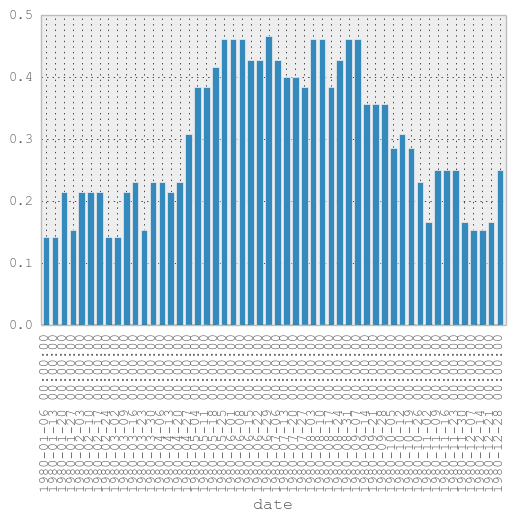

In [210]:
print len(batch)
%matplotlib inline
import pandas as pd
import matplotlib
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

eighty_df = pd.DataFrame(batch,columns=["date","year","ranks","title","authors","isbns","genders","ddc","fast"])

eighty_gender = eighty_df.set_index('date').genders

def count_females(arr):
    i = 0
    for x in arr:
        if x == "Female":
            i = i+1
    return i

i = 0
for x in eighty_df['genders']:
    if x is not None:
        i = i + count_females(x)
print i

grouped2 = eighty_df[["date","genders"]]

print eighty_df["genders"][0:10]
print eighty_df["date"][0:10]

grouped = eighty_df["genders"].groupby(eighty_df["date"])


def bin_dates_percent_female(df,group_col):
    grouped = df["genders"].groupby(df[group_col])
    target = []
    for group in grouped:
        females = 0
        overall_count = 0
        date = group[0]
        for genders in group[1]:
            if genders is not None:
                females = females+count_females(genders)
                for g in genders:
                    overall_count = overall_count+1
        percent = float(females)/float(overall_count)
        target.append([date,percent,overall_count])
    return target
        
percent_female_table = bin_dates_percent_female(eighty_df,"date")

df = pd.DataFrame(percent_female_table,columns=["date","percent_female","number_of_authors"])
df = df.set_index("date")

df["percent_female"].plot(kind="bar")

#grouped = sixtythree_series.groupby(level=0)

#for x in grouped:
#    for y in x:
#        print "Printing y"
#        if 'series' in str(type(y)):
#            print y

In [80]:
grouped3 = sixtythree_df["ddc"].groupby(sixtythree_df["date"])
for x in grouped3:
    if x is not None:
        print "Printing date"
        for y in x[1]:
            "Printing y!"
            print y

## Add up all the percents and labels within a date, divide each aggregated "percent" by 100 * the number of books
def summarize_ddc(ls_label_dict):
    return label[0]['label']

NameError: name 'sixtythree_df' is not defined

In [63]:
oclc_base = "http://classify.oclc.org/classify2/Classify?"
gender_dict = {}
test_isbns = ['0706610520', '3464127788', '0905712412', '067717604X', '0194216640', '0060502959', '0340013613', '0194230392']
test_authors = ['Mary Stewart']


# Returns an array of dicts format {'isbn':isbn,'oclc_id':oclc_i,'subjects'
# :subjects,'categories':categories,'genders':genders} if array lenghth > 1
# use sum_oclc to resolve/synthesize
def oclc_process(isbn_ls,authors):
    print isbn_ls
    print authors
    target = []
    done = []
    for isbn in isbn_ls:
        oclc_data = get_oclc_data(isbn)
        if (oclc_data['oclc_id'] not in done) and (oclc_data['holdings']!=0): 
            oclc_id = oclc_data['oclc_id']
            holdings = oclc_data['holdings']
            subjects = oclc_data['subjects']
            categories = oclc_data['ddc']
            genders = extract_gender(oclc_data['authors'],authors) 
            #Could turn this into an umbrella VIAF function, that returns genders and birth year
            row = {'isbn':isbn,'oclc_id':oclc_id,'subjects':subjects,'categories':categories,'genders':genders, 'holdings':holdings}
            done.append(oclc_id)
            target.append(row)
    if len(target)>1:
        print "Summarizing!"
        for row in target:
            print row
        target = summarize_oarr(target)
        print target
    return target[0]

# Go through an array of dicts, sorted by the number of holdings if the top holding has a blank value for a key,
# EEEK maybe use a while loop???
def summarize_oarr(oarr):
    sorted_target = sorted(oarr, key=lambda k: k['holdings'],reverse = True)
    target = {}
    for k in sorted_target[0].keys():
        i = 0 
        while True:
            if i == (len(oarr)-1):
                break
            item = sorted_target[i][k]
            if item != "" or item != 0 or item != []:
                target[k] = item
                break
            else:
                i = i+1
        if k not in target:
            target[k] = oarr[0][k]
    target["summarized_tag"] = 1
    return [target]

def max_holding(oarr):
    target = {}
    previous = oarr[0]
    for o in oarr:
        if o['holdings']>previous['holdings']:
            target = o
        previous = o
    return target
        
def url_to_x(url):
    req = urllib2.Request(url)
    req.add_header('User-agent', 'Mozilla 5.10')
    res = urllib2.urlopen(req)
    print res
    data = xml.etree.ElementTree.parse(res).getroot()
    return data
        
def extract_gender(oclc_a,author_ls):
    genders = []
    for a in author_ls:
        if a in gender_dict:
            genders.append(gender_dict[a])
        else:
            try:
                viaf_id = get_viaf_id(oclc_a,a)
            except:
                viaf_id = ""
            if viaf_id != "":
                viaf_dict[a] = viaf_id
                gender = get_gender_scrape(viaf_id)
                if gender != "":
                    gender_dict[a] = gender
                genders.append(gender)
    return genders
            
# Should I go into the VIAF and try to match the various labels?
def get_viaf_id(oclc_a_list,author):
    if author in viaf_dict:
        return viaf_dict[author]
    candidate = ""
    viaf = ""
    for b in oclc_a_list:
        if last_name(author) in b['name']:
            candidate = b['viaf']
            print first_name(author)
            if first_name(author) in b['name']:
                viaf = candidate
    if viaf == "":
        viaf = candidate
    return viaf

print oclc_process(test_isbns,test_authors)

['0706610520', '3464127788', '0905712412', '067717604X', '0194216640', '0060502959', '0340013613', '0194230392']
['Mary Stewart']
<addinfourl at 140646960992336 whose fp = <socket._fileobject object at 0x7feaecc6bb50>>
<class 'xml.etree.ElementTree.Element'>
<class 'xml.etree.ElementTree.Element'>
['823.9', '823.914', 'FIC', '823.91', '428.6', '823', 'Unclassified']
http://www.viaf.org/viaf/109491991/
Female
<addinfourl at 140646966894104 whose fp = <socket._fileobject object at 0x7feaec2410d0>>
<class 'xml.etree.ElementTree.Element'>
<class 'xml.etree.ElementTree.Element'>
<addinfourl at 140646966894176 whose fp = <socket._fileobject object at 0x7feaec241950>>
<class 'xml.etree.ElementTree.Element'>
<class 'xml.etree.ElementTree.Element'>
['823.914', 'Unclassified']
<addinfourl at 140646966382672 whose fp = <socket._fileobject object at 0x7feaec2419d0>>
<class 'xml.etree.ElementTree.Element'>
<class 'xml.etree.ElementTree.Element'>
<addinfourl at 140646966384184 whose fp = <socket._fi

In [79]:

def get_oclc_data(isbn):
    url = oclc_base +"isbn="+isbn
    xml = url_to_x(url)
    print type(xml)
    authors = extract_authors(xml) #returns a list of dicts of form {'name':'author_name','viaf':'viaf_id'}
    print type(xml)
    subjects = extract_subjects(xml) #returns a list of dicts of form {'subject':'subject_name','fast_id':'fast_id'}
    ddc = extract_ddc(xml) #returns a list of dicts of form {'label':'ddc_label', 'percent':'percent_of_entries_w_label'}
    oclc_id = extract_oid(xml)
    holdings = extract_holdings(xml)
    return {'authors':authors,'subjects':subjects,'ddc':ddc,'oclc_id':oclc_id,'holdings':holdings}

def extract_oid(oclc):
    work = oclc.find('{http://classify.oclc.org}work')
    oid = ""
    if work is not None:
        oid = work.get('owi')
    return oid

def extract_holdings(oclc):
    work = oclc.find('{http://classify.oclc.org}work')
    holdings = 0
    if work is not None:
        holdings = work.get('holdings')
    return holdings

def extract_authors(oclc):
    oclc_a = oclc.find('{http://classify.oclc.org}authors')
    author_arr = []
    if oclc_a is not None:
        for author in oclc_a:
            author_arr.append({"name":author.text,"viaf":author.get("viaf")})
    return author_arr

def extract_subjects(oclc):
    r = oclc.find('{http://classify.oclc.org}recommendations')
    subject_arr = []
    if r is not None:
        fast = r.find('{http://classify.oclc.org}fast')
        if fast is not None:
            oclc_s = fast.find('{http://classify.oclc.org}headings')
            for subject in oclc_s:
                subject_arr.append({"subject":subject.text,"fast_id":subject.get("ident")})
            return subject_arr

def extract_ddc(oclc):
    r = oclc.find('{http://classify.oclc.org}recommendations')
    ddc_ls = []
    if r is not None:
        ddc_summary = r.find('{http://classify.oclc.org}ddc')
        if ddc_summary is not None:
            graph_url = ddc_summary.find('{http://classify.oclc.org}graph').text
            ddc_ls = parse_graph_url(graph_url)
    return ddc_ls

def get_percentages(url):
    nurl = url.split("chd=t:")
    nurl = nurl[1].split("&")
    parr = nurl[0].split(",")
    return parr

def get_labels(url):
    nurl = url.split("chdl=")
    larr = nurl[1].split("|")
    print larr
    return larr

def parse_graph_url(gurl):
    p = get_percentages(gurl)
    l = get_labels(gurl)
    target = []
    i = 0
    for label in l:
        target.append({"label":label,"percent":p[i]})
        i = i+1
    return target

data = get_oclc_data("0140024034")
print data


<addinfourl at 140646528504320 whose fp = <socket._fileobject object at 0x7fead29d05d0>>
<class 'xml.etree.ElementTree.Element'>
<class 'xml.etree.ElementTree.Element'>
['823.91', '823.912', '820', 'FIC', '823.3', 'Unclassified']
{'ddc': [{'percent': '70.82758', 'label': '823.91'}, {'percent': '21.310345', 'label': '823.912'}, {'percent': '0.5862069', 'label': '820'}, {'percent': '0.1724138', 'label': 'FIC'}, {'percent': '0.03448276', 'label': '823.3'}, {'percent': '7.0689654', 'label': 'Unclassified'}], 'holdings': '2873', 'subjects': [{'fast_id': '1204289', 'subject': 'France'}, {'fast_id': '1354514', 'subject': 'Revolution (France : 1789-1799)'}, {'fast_id': '943191', 'subject': 'Glass manufacture'}, {'fast_id': '19563', 'subject': 'Louis XVII, of France, 1785-1795'}], 'oclc_id': '20377499', 'authors': [{'viaf': '24600806', 'name': 'Du Maurier, Daphne, 1907-1989'}]}


In [52]:
sample_title_auth = commasv[0][2]
#print sample_title_authR

#index into phrase to skip " by"
auth_i = 4

def title_author_pair(data_str):
    split_str = data_str.split(',')
    title = ""
    auth_ph = ""
    authors = []
    i=0
    j=1
    for phrase in split_str:
        if i == 0:
            title = phrase
        else:
            if phrase.isupper():
                title = title + ", "+phrase
            else:
                auth_ph = auth_ph+phrase
        i = i+1
    end = len(auth_ph)
    parens = auth_ph.find("(")
    if parens != -1:
        end = parens-1
    auth_ph = auth_ph[auth_i:end]
    if " and " in auth_ph:
        author_arr = auth_ph.split(" and ")
        for author in author_arr:
            if author[len(author)-1]=='.':
                author = author[:len(author)-1] # strip trailing period
            authors.append(author)
    else:
        author = auth_ph
        if author[len(author)-1]=='.':
            author = author[:len(author)-1] # strip trailing period
        authors.append(author)
    return (title,authors)            
                
for x in eighty[0][0:20]:
    print title_author_pair(x[2])

("SMILEY'S PEOPLE", ['John le Carr\xc3\xa9'])
("THE DEVIL'S ALTERNATIVE", ['Frederick Forsyth'])
('JAILBIRD', ['Kurt Vonnegut'])
('TRIPLE', ['Ken Follett'])
('MEMORIES OF ANOTHER DAY', ['Harold Robbins'])
('THE ESTABLISHMENT', ['Howard Fast'])
('PRINCESS DAISY', ['Judith Krantz'])
("SOPHIE'S CHOICE", ['William Styron'])
('THE TOP OF THE HILL', ['Irwin Shaw'])
('PORTRAITS', ['Cynthia Freeman'])
("THE EXECUTIONER'S SONG", ['Norman Mailler'])
('THE DEAD ZONE', ['Stephen King'])
('THE LAST ENCHANTMENT', ['Mary Stewart'])
('THE THIRD WORLD WAR: August 1985', ['General Sir John Hackett', 'Other'])
('MOVIOLA', ['Garson Kanin'])


In [307]:
for row in commasv:
    print(title_author_pair(row[2]))

('TRAVELS WITH CHARLEY', ['John Steinbeck'])
('HAPPINESS IS A WARM PUPPY', ['Charles M. Schulz'])
('FINAL VERDICT', ['Adela Rogers St. Johns'])
('THE WHOLE TRUTH AND NOTHING BUT', ['Hedda Hopper'])
('O YE JIGS & JULEPS!', ['Virginia Cary Hudson'])
('THE FIRE NEXT TIME', ['James Baldwin'])
('SILENT SPRING', ['Rachel Carson'])
('MY LIFE IN COURT', ['Louis Nizer'])
('POINTS OF MY COMPASS', ['E.B. White'])
('THE FALL OF THE DYNASTIES', ['Edmond Taylor'])


# Data Collection and Storage

Store all data as we go through as a table (or look into pandas dataframe?). Each row is a BestSellers row and is formatted:

* date -- date
* title -- string
* author(s) -- arr[string]
* isbn_list -- arr[int]
* author_wiki_dat_id -- int
* author_gender(s) -- arr[string]

Maybe if there are too few ISBN matches for a book I should flag it for manual tagging? How few is too few? Will have to experiment.

Also want to store running dictionaries of these values so I don't need to call the function for the repeat appearances:

* {(Title,Author):[isbn_list, gender]}

# Getting ISBN from Title/Author Name


In [123]:
%run "key.py"

suffixes = ['CPA', 'CSC', 'CSJ', 'DC', 'DD', 'DDS', 'DMD', 'DO', 'DVM', 'EDD', 'ESQ', 'II', 'III', 
            'IV', 'INC', 'JD', 'JR', 'LLD', 'LTD', 'MD', 'OD', 'OSB', 'PC', 'PE', 'PHD', 'RET', 
            'RGS', 'RN', 'RNC', 'SHCJ', 'SJ', 'SNJM', 'SR', 'SSMO', 'USA', 'USAF', 'USAFR', 'USAR', 
            'USCG', 'USMC', 'USMCR', 'USN', 'USNR']

prefixes = []

digits = ['1','2','3','4','5','6','7','8','9','0']
symbol_dict = {'%':'percent','$':'dollar', '1/2':'half'}

isbn_plus_base_url = "https://api-2445581351187.apicast.io:443"
plus_key = isbn_plus_key
search_plus = "/search?app_key="+plus_key+"&app_id="+app_id+"&t="
print isbn_plus_base_url+search_plus+"Potatoes"
alph = re.compile('[^a-zA-Z]')

db_key = isbn_db_key
isbn_db_base = "http://isbndb.com/api"
search_db = "/books.xml?access_key="+db_key+"&index1=title&value1="
print isbn_db_base+search_db+"Potatoes"

def convert_to_search(name):
    return_string = ""
    last_ch = " "
    for ch in name:
        if (ch == " "):
            if (last_ch != "."):
                return_string = return_string + "+"
        else:
            if ch == ".":
                return_string = return_string +".+"
            else:
                return_string = return_string+ch
        last_ch = ch
    return return_string

def url_to_xml(url):
    req = urllib2.Request(url)
    req.add_header('User-agent', 'Mozilla 5.10')
    res = urllib2.urlopen(req)
    print res
    data = xml.etree.ElementTree.parse(res).getroot()[0]
    for book in data.findall('BookData'):
        isbn = book.get('isbn')
        title = book.find('Title').text
        author = book.find('AuthorsText').text
        print(isbn,title,author)
    return data

def suffix(phrase):
    norm_phrase = phrase.replace(',',"").upper()
    if norm_phrase in suffixes:
        return True
    else:
        return False

def prefix(phrase):
    norm_phrase = phrase.replace(',',"").upper()
    if norm_phrase in prefixes:
        return True
    else:
        return False

    
def last_name_recursive(name,last_index):
    if last_index == 0:
        return ""
    last_phrase = name[last_index]
    if not suffix(last_phrase):
        return last_phrase
    else:
        return last_name_recursive(name, last_index-1)

def last_name(name):
    names = name.split(" ")
    last_index = len(names)-1
    last = last_name_recursive(names,last_index)
    return last

def first_name(name):
    names = name.split(" ")
    return names[0]

def strip_punct(text):
    return alph.sub('', text)

def has_numbers(text):
    for digit in digits:
        if digit in text:
            return True
    return False

def has_symbols(text):
    for symbol in symbol_dict:
        if symbol in text:
            return True
    return False

def norm_text(text):
    return strip_punct(text).lower()

def is_book(booxml, title, authors):
    xml_title = booxml.find('Title').text
    norm_xml_title = norm_text(xml_title)
    norm_title = norm_text(title)
    if(norm_xml_title in norm_title) or (norm_title in norm_xml_title):
        xml_authors = booxml.find('AuthorsText').text
        if xml_authors is None:
            return False
        for author in authors:
            if norm_text(author) in norm_text(xml_authors):
                print "Adding ISBN! "+xml_title+" by "+xml_authors
                return True
            xml_names = []
            for xmla in xml_authors.split(" "):
                norm_text(xmla)
            for author in authors:
                if norm_text(last_name(author)) in xml_authors.split(" "):
                    print xml_authors.split(" ")
                    print "Adding ISBN! "+xml_title+" by "+xml_authors
                    return True        
        return False

def get_isbns(title,authors):
    isbns = set()
    search_t = convert_to_search(title)
    url = isbn_db_base+search_db+search_t
#    print row[0].year
    data = url_to_xml(url)
    for book in data:
        if (is_book(book,title,authors)):
            isbns.add(book.get('isbn'))            
    return isbns

https://api-2445581351187.apicast.io:443/search?app_key=62f7cedf62afa7006026634aaadce211&app_id=7f7512d5&t=Potatoes
http://isbndb.com/api/books.xml?access_key=1DR9S9TA&index1=title&value1=Potatoes


In [8]:
print last_name('Charles W. Bailey II')

Bailey


In [16]:
def process_bs_list(best_sellers, year):
    target = []
    for row in best_sellers:
        title_author = title_author_pair(row[2])
        print str(title_author)
        isbns = []
        if has_symbols(title_author[0]) or has_numbers(title_author[0]):
            manual_titles.append(title_author)
        else:
            stritle_author = str(title_author)
            if stritle_author not in done_dict:
                isbns = get_isbns(title_author[0],title_author[1])
                if len(isbns) == 0:
                    manual_titles.append(title_author)
                done_dict[stritle_author] = isbns
            else:
                isbns = done_dict[stritle_author]
        target.append([year,title_author[0],title_author[1],isbns])
    return target
                
for x in process_bs_list(commasv,1963):
    print x

('TRAVELS WITH CHARLEY', ['John Steinbeck'])
<addinfourl at 139723408233032 whose fp = <socket._fileobject object at 0x7f13e429af50>>
('1405509163', 'Travels with Charley', None)
('043474011X', 'Travels with Charley', 'John Steinbeck')
('0783887914', 'Travels with Charley', 'John Steinbeck')
('0330201107', 'Travels with Charley', 'John Steinbeck')
('0808588761', 'Travels With Charley', None)
('0140053204', 'Travels with Charley', 'John Steinbeck')
('0142000701', 'Travels with Charley', 'John Steinbeck')
('1560773448', 'Travels With Charley', 'Judie Henson, Sheryl Lee Hinman, ')
('0788734822', 'Travels with Charley In Search of America', 'John Steinbeck, Ron McLarty (Narrator)')
('0141186100', 'Travels with Charley in search of America', 'John Steinbeck; with an introduction by Jay Parini')
Adding ISBN! Travels with Charley by John Steinbeck
Adding ISBN! Travels with Charley by John Steinbeck
Adding ISBN! Travels with Charley by John Steinbeck
Adding ISBN! Travels with Charley by John S

In [26]:
def process_bs_batch(batch):
    batch_target = []
    for ls in batch:
        process_bs_list(ls)


[('TRIUMPH', ['Philip Wylie'])]


# Getting Gender Data from Author Name

In [11]:
wiki_name_to_id = "https://www.wikidata.org/w/api.php?action=wbsearchentities&language=en&format=json&search="
wiki_id_to_data = "https://www.wikidata.org/w/api.php?action=wbgetentities&format=json&props=claims&languages=en&ids="
gender_prop_id = "P21"
wiki_gender_hash = {"Q6581097":"male", "Q6581072":"female","Q1052281":"transf","Q2449503":"transm","Q1097630":"intersex"}

import urllib2
import json

def url_to_data( url ):
    req = urllib2.Request(url)
    req.add_header('User-agent', 'Mozilla 5.10')
    res = urllib2.urlopen(req)
    data = json.load(res)
    return data

def same_gender(id_list):
    id_0 = id_list[0]
    for i in id_list[1:]:
        if gender_from_id(id_0) != gender_from_id(i):
            return False
    return True

## This needs to disambiguate -- does it need to pull more information by id?
## Let's do it
def disambiguate(entity_data, name):
    entities = []
    for entity in entity_data:
        if 'description' in entity:
            desc = entity['description'].lower()
            ent_id = entity['id']
            if ('novel' in desc) or ('write' in desc) or ('auth' in desc) or ('cartoo' in desc) or ('journ' in desc) or ('comic' in desc):
                entities.append((ent_id,desc))
    if len(entities)==0:
        print "No novelists, writers, authors, cartoonists, journalists or comics named "+name
        manual_genders.add(name)
        for x in entity_data:
            print x
    return entities

def get_wiki_id(name):
    search_term = convert_to_search(name)
    url = wiki_name_to_id + search_term
    data = url_to_data(url)['search']
    if data == []:
        return [-1]
    dis_data = disambiguate(data,name)
    if dis_data == []:
        return [-1]
    i = []
    for entity in dis_data:
        i.append(entity[0])
    return i

def gender_from_id(auth_id):
    url = wiki_id_to_data + auth_id
    print url
    claims = url_to_data(url)['entities'][str(auth_id)]['claims']['P21']
    gender_arr =[]
    for claim in claims:
        if claim['mainsnak']['datavalue']['value'] is not None:
            gender_id = claim['mainsnak']['datavalue']['value']['id']
            gender_arr.append(wiki_gender_hash[gender_id])
    if len(gender_arr)>1:
        gender = max_value(gender_arr) ## FIX THIS
    else:
        gender = gender_arr[0]
    return gender


#def book_to_key_facts(book_data):

def author_to_gender(author_name):
    gender = ""
    author_id = []
    author_id = get_wiki_id(author_name)
    print author_id
    if author_id[0] == -1:
        print "Unable to find "+author_name+" in database"
        return "unknown"
    if len(author_id)>1:
        print "More than one writer by the name "+author_name
        if(same_gender(author_id)):
            gender = gender_from_id(author_id[0])
    else:
        gender = gender_from_id(author_id[0])
        return gender

# FUCK WIKIDATA, LIBRARIES GOT ME COVERED

Look up book genres by ISBN using this tool:

https://platform.worldcat.org/api-explorer/apis/Classify

classify.oclc.org/classify2/Classify?oclc=57358293&summary=true

I could also apparently use this to GET isbns -- I'll try it for a table and compare.

This returns authors per book with their names and VIAF id, which I can look up here:

https://platform.worldcat.org/api-explorer/apis/VIAF
https://platform.worldcat.org/api-explorer/apis/VIAF/AuthorityCluster/Identify


In [10]:
print author_to_gender("Virginia Cary Hudson")

[u'Q15637611']
https://www.wikidata.org/w/api.php?action=wbgetentities&format=json&props=claims&languages=en&ids=Q15637611
female


In [54]:
for row in commasv:
    authors = title_author_pair(row[2])[1]
    for author in authors:
        gender = author_to_gender(author)
        print author + " was a "+gender

[u'Q39212', u'Q5559244']
More than one writer by the name John Steinbeck
https://www.wikidata.org/w/api.php?action=wbgetentities&format=json&props=claims&languages=en&ids=Q39212
https://www.wikidata.org/w/api.php?action=wbgetentities&format=json&props=claims&languages=en&ids=Q5559244
https://www.wikidata.org/w/api.php?action=wbgetentities&format=json&props=claims&languages=en&ids=Q39212
John Steinbeck was a male
[u'Q298920']
https://www.wikidata.org/w/api.php?action=wbgetentities&format=json&props=claims&languages=en&ids=Q298920
Charles M. Schulz was a male
[u'Q353774']
https://www.wikidata.org/w/api.php?action=wbgetentities&format=json&props=claims&languages=en&ids=Q353774
Adela Rogers St. Johns was a female
No novelists, writers, authors, cartoonists, journalists or comics named Hedda Hopper
{u'pageid': 262584, u'description': u'Actress, gossip columnist, radio personality', u'title': u'Q271324', u'concepturi': u'http://www.wikidata.org/entity/Q271324', u'label': u'Hedda Hopper', u'u

# ISBNS & Author Name to Gender

Use the VIAF api https://platform.worldcat.org/api-explorer/apis/VIAF/AuthorityCluster/GetDataInFormat

# ISBNS to Subjects/Genres/DDC Category

Use the OCLC classify api -- much better than goodreads! http://classify.oclc.org/classify2/api_docs/

In [175]:
VIAF = {"Jane Austen":"102333412","James Tiptree":"266704950","Dan Brown":"102403515","J.K. Rowling":"116796842",
        "J.D. Salinger":"17092","Chimamanda":"87194517","Dostoyevski":"104023256", "Hedda Hopper":"52211425"}
headers= {"User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.82 Safari/537.36"}

import urllib2
import xml.etree.ElementTree
from lxml import html
from bs4 import BeautifulSoup
import requests

viaf_base = "http://www.viaf.org/viaf/"


def get_gender_scrape(i):
    url = viaf_base+str(i)+"/"
    print url
    data = requests.get(url).text
    soup = BeautifulSoup(data,"lxml")
    personal = soup.find('div',{'id':'personalinfo'})
    h4s = personal.find('h4')
    if (h4s is None) or (len(h4s)<5):
        return ""
    #print type(h4s)
    mt = []
    i=0
    for h in h4s:
        mt.append(h)
        #print "element "+str(i)+": "+str(h)
        i = i+1
    print mt[4]
    return mt[4]

print get_gender_scrape(VIAF["Dan Brown"])

#tree = html.fromstring(page.content)
#print page.text
#tags =  tree.xpath("//*[@id='personalinfo']/h4/span[class='langHi0']")
#print tags


http://www.viaf.org/viaf/102403515/
Male
Male


In [25]:

for v in VIAF:
    print VIAF[v]
    print v+" is tagged as: "+str(get_gender_scrape(VIAF[v]))

102403515
http://www.viaf.org/viaf/102403515/
Male
Dan Brown is tagged as: Male
116796842
http://www.viaf.org/viaf/116796842/
Female
J.K. Rowling is tagged as: Female
266704950
http://www.viaf.org/viaf/266704950/
Female
James Tiptree is tagged as: Female
104023256
http://www.viaf.org/viaf/104023256/
Male
Dostoyevski is tagged as: Male
52211425
http://www.viaf.org/viaf/52211425/
Female
Hedda Hopper is tagged as: Female
102333412
http://www.viaf.org/viaf/102333412/
Jane Austen is tagged as: 
17092
http://www.viaf.org/viaf/17092/
Male
J.D. Salinger is tagged as: Male
87194517
http://www.viaf.org/viaf/87194517/
Female
Chimamanda is tagged as: Female
